In [1]:
!pip install yfinance

import yfinance as yf
import pandas as pd
import numpy as np

# Colab 進行matplotlib繪圖時顯示繁體中文
# 下載台北思源黑體並命名taipei_sans_tc_beta.ttf，移至指定路徑
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download

import matplotlib as mpl
import matplotlib.pyplot as plt 
from matplotlib.font_manager import fontManager

# 改style要在改font之前
# plt.style.use('seaborn')  

fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
mpl.rc('font', family='Taipei Sans TC Beta')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 KB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 KB 18.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 17.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 69.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.0/111.0 KB 15.6 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
  

[*********************100%***********************]  1 of 1 completed


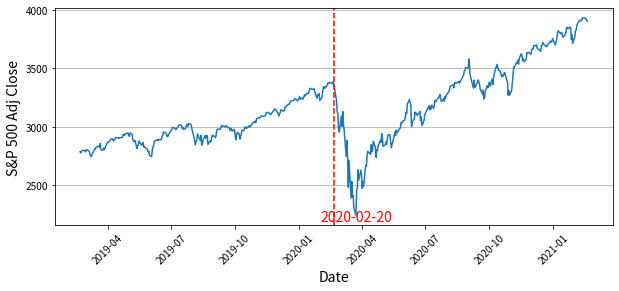

In [2]:
from datetime import datetime
SP = yf.download("^GSPC", start='2019-02-20', end='2021-02-20')['Adj Close'] #僅取得close價格 #USD
fig, ax = plt.subplots(figsize=(10, 4))
mpl.rcParams['xtick.labelsize'] = 16 
mpl.rcParams['ytick.labelsize'] = 16 
# plt.style.use('default')
ax.plot(SP)
# plt.legend(loc='center left', bbox_to_anchor=(1.1, 0.5), fontsize=14)
# plt.axvline(datetime(2020, 2, 19), color='red', linestyle='--')
# ax.text(datetime(2020, 2, 19), 0.05, '2020-02-19', color='red', transform=ax.get_xaxis_transform(), ha='center', va='top', rotation=0)

plt.axvline(datetime(2020, 2, 20), color='red', linestyle='--')
ax.text(datetime(2020, 3, 23), 0.07, '2020-02-20', color='red', transform=ax.get_xaxis_transform(), ha='center', va='top', rotation=0, fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('S&P 500 Adj Close', fontsize=14)
plt.grid(axis='y')
plt.xticks(rotation=45)
# plt.savefig("/content/drive/MyDrive/政大課程/111金融計量/S&P500.png", bbox_inches='tight')         
plt.show()

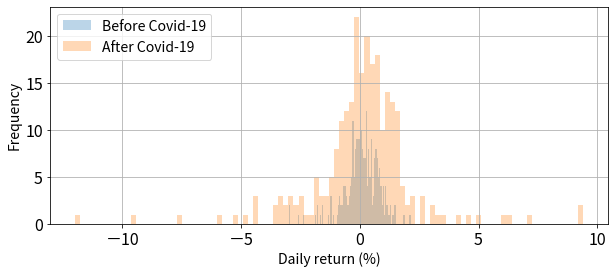

In [3]:
before = SP.loc[(SP.index>='2019-02-20')&(SP.index<'2020-02-20')].pct_change() #疫情前
after = SP.loc[(SP.index>='2020-02-20')&(SP.index<'2021-2-20')].pct_change() #疫情後

fig, ax = plt.subplots(figsize=(10, 4))
mpl.rcParams['xtick.labelsize'] = 16 
mpl.rcParams['ytick.labelsize'] = 16 
(before*100).hist(ax=ax, bins=100, alpha=0.3, label='Before Covid-19')
(after*100).hist(ax=ax, bins=100, alpha=0.3, label='After Covid-19')
plt.legend(loc='upper left', fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.xlabel("Daily return (%)", fontsize=14)
# plt.savefig("/content/drive/MyDrive/政大課程/111金融計量/S&P500ReturnDist.png", bbox_inches='tight')         
plt.show()

In [4]:
import pandas as pd
path = "https://en.wikipedia.org/wiki/List_of_S%26P_500_companies"
data = pd.read_html(path)[0]
data = data[['Symbol', 'GICS Sector']]
data['部門'] = data['GICS Sector'].replace({"Information Technology":"Information Technology(科技)",
                "Industrials":"Industrials(工業)",
                "Financials":"Financials(金融)",
                "Health Care":"Health Care(醫療)",
                "Consumer Discretionary":"Consumer Discretionary(非必需消費品)",
                "Consumer Staples":"Consumer Staples(必需消費品)",
                "Real Estate":"Real Estate(房地產)",
                "Utilities":"Utilities(公營事業)",
                "Materials":'Materials(材料)',
                "Communication Services":"Communication Services(通訊服務)",
                "Energy":"Energy(能源)"})

data

,Symbol,GICS Sector,部門
0,MMM,Industrials,Industrials(工業)
1,AOS,Industrials,Industrials(工業)
2,ABT,Health Care,Health Care(醫療)
3,ABBV,Health Care,Health Care(醫療)
4,ACN,Information Technology,Information Technology(科技)
...,...,...,...
498,YUM,Consumer Discretionary,Consumer Discretionary(非必需消費品)
499,ZBRA,Information Technology,Information Technology(科技)
500,ZBH,Health Care,Health Care(醫療)
501,ZION,Financials,Financials(金融)


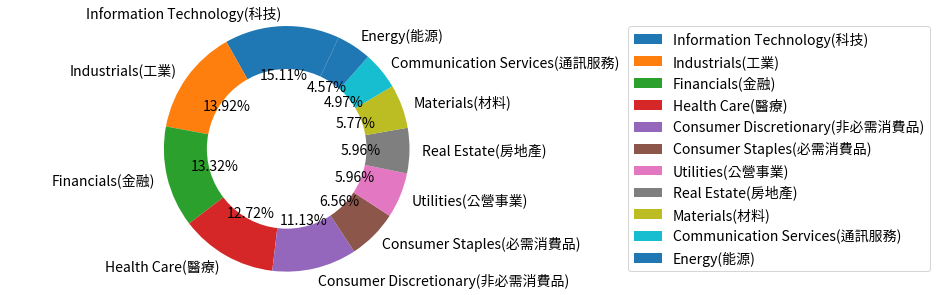

In [5]:
import matplotlib.pyplot as plt 
#產業別
sector = data['部門'].value_counts()
labels = sector.index
share = sector.values
fig, ax = plt.subplots(figsize=(10, 5))
ax.pie(x=share, labels=labels, autopct='%.2f%%', startangle=65, textprops={"fontsize":14})
ax.axis('equal')
plt.legend(loc='center left', bbox_to_anchor=(1.1, 0.5), fontsize=14)
circle = plt.Circle(xy=(0,0), radius=.65, facecolor='white')
plt.gca().add_artist(circle)
# plt.savefig("/content/drive/MyDrive/政大課程/111金融計量/sector.png", bbox_inches='tight')     
plt.show()

In [6]:
#資料載入
ls = data.Symbol.to_list() #股票代號
# df = yf.download(ls, start='2019-02-20', end='2021-02-20')['Adj Close'] #僅取得close價格
# df.to_csv("/content/drive/MyDrive/政大課程/111金融計量/歷史資料.csv")
df = pd.read_csv("/content/drive/MyDrive/政大課程/111金融計量/歷史資料.csv")
df['Date'] = pd.to_datetime(df['Date'])
df = pd.melt(df, id_vars=['Date'], value_vars=df.columns, var_name='Symbol', value_name='price')
dfs = pd.merge(df, data, on='Symbol', how='left')
dfs

,Date,Symbol,price,GICS Sector,部門
0,2019-02-20,A,76.350212,Health Care,Health Care(醫療)
1,2019-02-21,A,75.699043,Health Care,Health Care(醫療)
2,2019-02-22,A,76.214149,Health Care,Health Care(醫療)
3,2019-02-25,A,77.108261,Health Care,Health Care(醫療)
4,2019-02-26,A,76.340508,Health Care,Health Care(醫療)
...,...,...,...,...,...
254010,2021-02-12,ZTS,164.843964,Health Care,Health Care(醫療)
254011,2021-02-16,ZTS,164.458313,Health Care,Health Care(醫療)
254012,2021-02-17,ZTS,167.009430,Health Care,Health Care(醫療)
254013,2021-02-18,ZTS,166.070068,Health Care,Health Care(醫療)


<ipython-input-7-0032534e7416>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfs_before['ret'] = dfs_before.groupby('Symbol')['price'].pct_change()
<ipython-input-7-0032534e7416>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfs_after['ret'] = dfs_after.groupby('Symbol')['price'].pct_change()


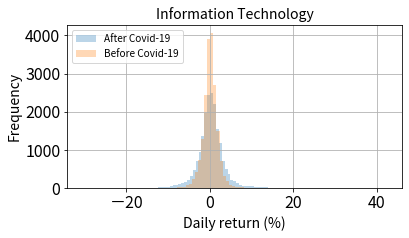

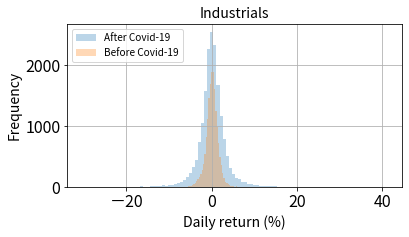

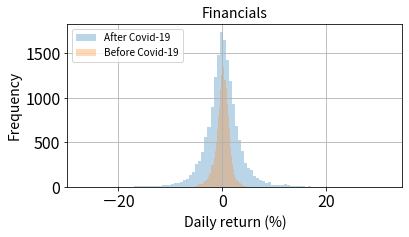

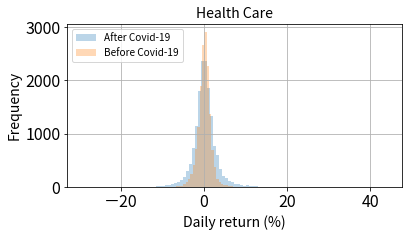

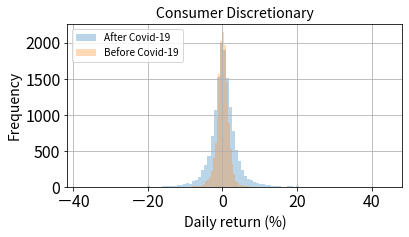

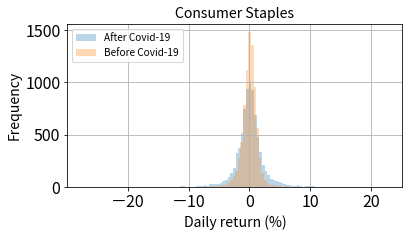

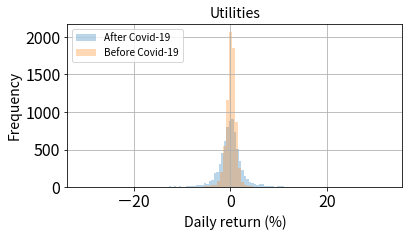

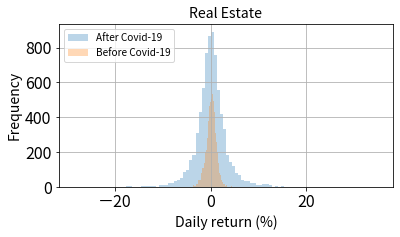

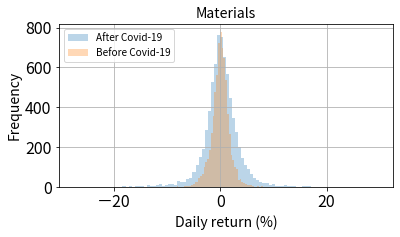

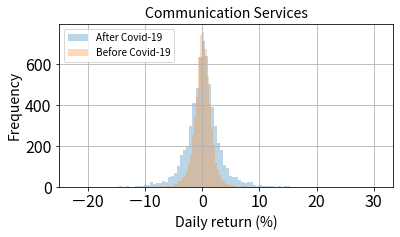

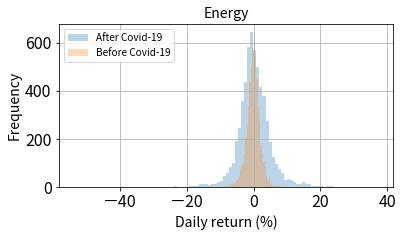

OK


In [7]:
before_mean = []
before_std = []
after_mean = []
after_std = []

sector = dfs['GICS Sector'].value_counts().index.to_list()
for i in range(len(sector)):
  fig, ax = plt.subplots(figsize=(6, 3))
  mpl.rcParams['xtick.labelsize'] = 16 
  mpl.rcParams['ytick.labelsize'] = 16 
  name = sector[i]
  dfs_before = dfs.loc[(dfs['Date']>='2019-02-20')&(dfs['Date']<'2020-02-20')&(dfs['GICS Sector']==name)]
  dfs_before['ret'] = dfs_before.groupby('Symbol')['price'].pct_change()

  dfs_after = dfs.loc[(dfs['Date']>='2020-02-20')&(dfs['Date']<'2021-2-20')&(dfs['GICS Sector']==name)]
  dfs_after['ret'] = dfs_after.groupby('Symbol')['price'].pct_change()

  (dfs_after['ret']*100).hist(ax=ax, bins=100, alpha=0.3, label='After Covid-19')
  (dfs_before['ret']*100).hist(ax=ax, bins=100, alpha=0.3, label='Before Covid-19')

  plt.legend(loc='upper left', fontsize=10)
  plt.title(name, fontsize=14)
  plt.ylabel("Frequency", fontsize=14)
  plt.xlabel("Daily return (%)", fontsize=14)
  # plt.savefig(f"/content/drive/MyDrive/政大課程/111金融計量/{name}ReturnDist.png", bbox_inches='tight')       
  plt.show()

  before_mean.append(dfs_before.groupby('Symbol')['ret'].mean())
  before_std.append(dfs_before.groupby('Symbol')['ret'].std())
  after_mean.append(dfs_after.groupby('Symbol')['ret'].mean())
  after_std.append(dfs_after.groupby('Symbol')['ret'].std())

print('OK')

In [8]:
des = []
for i in range(len(sector)):
  des.append([sector[i], len(before_mean[i]), before_mean[i].mean(), before_std[i].mean(), after_mean[i].mean(), after_std[i].mean()])
table = pd.DataFrame(des)
table.columns = ['產業', '家數', '疫情前的平均報酬', '疫情前的平均標準差', '疫情後的平均報酬', '疫情後的平均標準差']

table['疫情前/後的平均報酬(%)'] = round((table['疫情前的平均報酬']*100),4).astype(str)+'/'+round((table['疫情後的平均報酬']*100),4).astype(str)
table['疫情前/後的平均標準差'] = round((table['疫情前的平均標準差']),4).astype(str)+'/'+round((table['疫情前的平均標準差']),4).astype(str)

# table.to_csv("/content/drive/MyDrive/政大課程/111金融計量/Describe.csv")
display(table)

,產業,家數,疫情前的平均報酬,疫情前的平均標準差,疫情後的平均報酬,疫情後的平均標準差,疫情前/後的平均報酬(%),疫情前/後的平均標準差
0,Information Technology,76,0.001408,0.018389,0.001747,0.032946,0.1408/0.1747,0.0184/0.0184
1,Industrials,70,0.000804,0.014875,0.001158,0.032026,0.0804/0.1158,0.0149/0.0149
2,Financials,67,0.000834,0.013580,0.001010,0.036536,0.0834/0.101,0.0136/0.0136
3,Health Care,63,0.000845,0.016534,0.001210,0.028984,0.0845/0.121,0.0165/0.0165
4,Consumer Discretionary,56,0.000803,0.017361,0.001705,0.039301,0.0803/0.1705,0.0174/0.0174
5,Consumer Staples,33,0.000692,0.013430,0.000513,0.024334,0.0692/0.0513,0.0134/0.0134
6,Utilities,30,0.000987,0.011313,-0.000144,0.029388,0.0987/-0.0144,0.0113/0.0113
7,Real Estate,30,0.000784,0.011050,0.000411,0.035495,0.0784/0.0411,0.0111/0.0111
8,Materials,29,0.000359,0.016855,0.001632,0.033924,0.0359/0.1632,0.0169/0.0169
9,Communication Services,25,0.000840,0.015986,0.001399,0.030729,0.084/0.1399,0.016/0.016


In [9]:
sector

['Information Technology',
 'Industrials',
 'Financials',
 'Health Care',
 'Consumer Discretionary',
 'Consumer Staples',
 'Utilities',
 'Real Estate',
 'Materials',
 'Communication Services',
 'Energy']

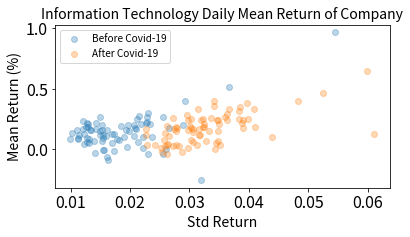

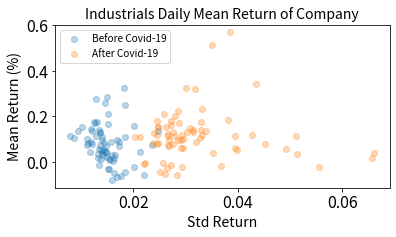

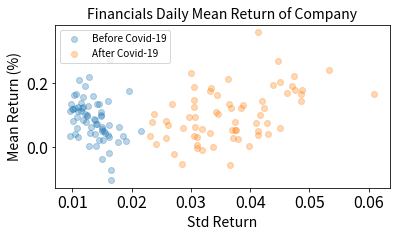

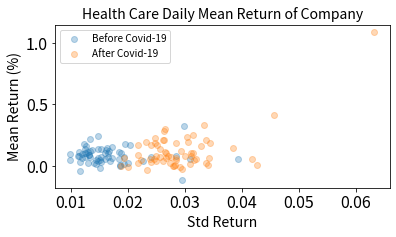

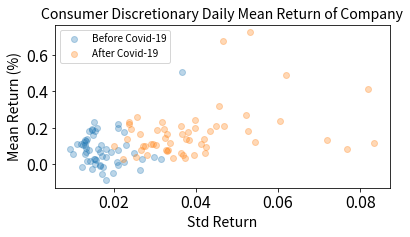

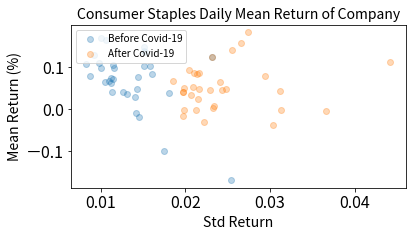

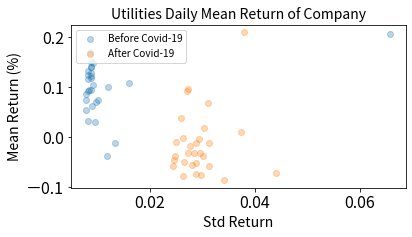

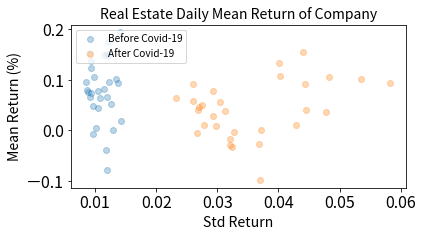

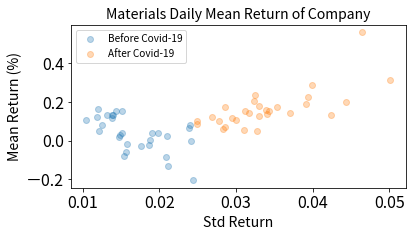

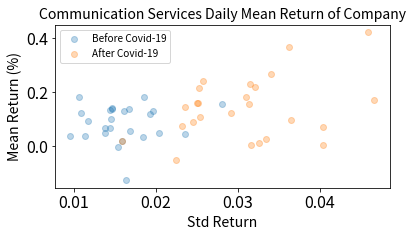

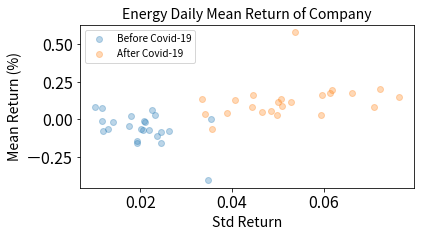

In [10]:
before_ls = []
after_ls = []

for i in range(len(sector)):
  name = sector[i]
  fig, ax = plt.subplots(figsize=(6, 3))
  mpl.rcParams['xtick.labelsize'] = 16 
  mpl.rcParams['ytick.labelsize'] = 16

  ax.scatter(x=before_std[i], y=before_mean[i]*100, alpha=0.3, label='Before Covid-19')
  ax.scatter(x=after_std[i], y=after_mean[i]*100, alpha=0.3, label='After Covid-19')

  before_SR = round((before_mean[i]/ before_std[i]).mean(),4)
  after_SR = round((after_mean[i]/ after_std[i]).mean(),4)

  before_ls.append(before_SR)
  after_ls.append(after_SR)

  plt.legend(loc='upper left', fontsize=10)
  plt.title(name+' Daily Mean Return of Company', fontsize=14)
  plt.ylabel('Mean Return (%)', fontsize=14)
  plt.xlabel('Std Return', fontsize=14)
  # plt.savefig(f"/content/drive/MyDrive/政大課程/111金融計量/{name}ReturnScatter.png", bbox_inches='tight')   
  plt.show()

,before_SR,after_SR,diff
Information Technology,0.0776,0.0507,-0.0269
Industrials,0.0592,0.0377,-0.0215
Financials,0.0670,0.0268,-0.0402
Health Care,0.0558,0.0390,-0.0168
Consumer Discretionary,0.0494,0.0444,-0.0050
Consumer Staples,0.0609,0.0214,-0.0395
Utilities,0.1045,-0.0054,-0.1099
Real Estate,0.0728,0.0113,-0.0615
Materials,0.0302,0.0463,0.0161
Communication Services,0.0557,0.0449,-0.0108


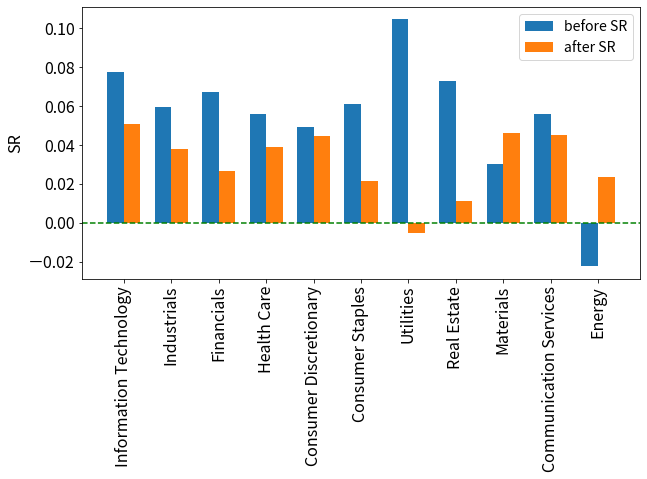

In [11]:
table = pd.DataFrame([before_ls, after_ls]).T
table.index = sector
table.columns = ['before_SR', 'after_SR']
table['diff'] = table['after_SR'] - table['before_SR']
# table.to_csv("/content/drive/MyDrive/政大課程/111金融計量/SR.csv")
display(table)

x = np.arange(len(sector))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 5))
rects1 = ax.bar(x - width/2, table['before_SR'], width, label='before SR')
rects2 = ax.bar(x + width/2, table['after_SR'], width, label='after SR')

ax.set_ylabel('SR', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(sector, rotation=90)
ax.legend(fontsize=14)
ax.axhline(y=0, linestyle='--', color='green')
# plt.savefig(f"/content/drive/MyDrive/政大課程/111金融計量/SR.png", bbox_inches='tight') 
plt.show()

In [12]:
SR = pd.read_csv("/content/drive/MyDrive/政大課程/111金融計量/SR.csv")
SR.set_index('Unnamed: 0', inplace=True)
SR

,before_SR,after_SR,diff
Unnamed: 0,,,
Information Technology,0.0776,0.0507,-0.0269
Industrials,0.0592,0.0377,-0.0215
Financials,0.0670,0.0268,-0.0402
Health Care,0.0558,0.0390,-0.0168
Consumer Discretionary,0.0494,0.0444,-0.0050
Consumer Staples,0.0609,0.0214,-0.0395
Utilities,0.1045,-0.0054,-0.1099
Real Estate,0.0728,0.0113,-0.0615
Materials,0.0302,0.0463,0.0161


In [13]:
import numpy as np

dfs['Price_Return'] = dfs.groupby(['Symbol'])['price'].pct_change()
#sector#dummy
dfs['Technology'] = np.where(dfs['GICS Sector']=='Information Technology', 1, 0)
dfs['Industrials'] = np.where(dfs['GICS Sector']=='Industrials', 1, 0)
dfs['Financials'] = np.where(dfs['GICS Sector']=='Financials', 1, 0)
dfs['Health'] = np.where(dfs['GICS Sector']=='Health Care', 1, 0)
dfs['Discretionary'] = np.where(dfs['GICS Sector']=='Consumer Discretionary', 1, 0)
dfs['Staples'] = np.where(dfs['GICS Sector']=='Consumer Staples', 1, 0)
dfs['Estate'] = np.where(dfs['GICS Sector']=='Real Estate', 1, 0)
dfs['Utilities'] = np.where(dfs['GICS Sector']=='Utilities', 1, 0)
dfs['Materials'] = np.where(dfs['GICS Sector']=='Materials', 1, 0)
dfs['Services'] = np.where(dfs['GICS Sector']=='Communication Services', 1, 0)
dfs['Energy'] = np.where(dfs['GICS Sector']=='Energy', 1, 0)
#year#dummy
dfs['Covid'] = np.where(dfs['Date']>='2020-02-20', 1, 0)

dfs.dropna(inplace=True)
dfs

,Date,Symbol,price,GICS Sector,部門,Price_Return,Technology,Industrials,Financials,Health,Discretionary,Staples,Estate,Utilities,Materials,Services,Energy,Covid
1,2019-02-21,A,75.699043,Health Care,Health Care(醫療),-0.008529,0,0,0,1,0,0,0,0,0,0,0,0
2,2019-02-22,A,76.214149,Health Care,Health Care(醫療),0.006805,0,0,0,1,0,0,0,0,0,0,0,0
3,2019-02-25,A,77.108261,Health Care,Health Care(醫療),0.011732,0,0,0,1,0,0,0,0,0,0,0,0
4,2019-02-26,A,76.340508,Health Care,Health Care(醫療),-0.009957,0,0,0,1,0,0,0,0,0,0,0,0
5,2019-02-27,A,77.186028,Health Care,Health Care(醫療),0.011076,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254010,2021-02-12,ZTS,164.843964,Health Care,Health Care(醫療),0.013804,0,0,0,1,0,0,0,0,0,0,0,1
254011,2021-02-16,ZTS,164.458313,Health Care,Health Care(醫療),-0.002339,0,0,0,1,0,0,0,0,0,0,0,1
254012,2021-02-17,ZTS,167.009430,Health Care,Health Care(醫療),0.015512,0,0,0,1,0,0,0,0,0,0,0,1
254013,2021-02-18,ZTS,166.070068,Health Care,Health Care(醫療),-0.005625,0,0,0,1,0,0,0,0,0,0,0,1


In [14]:
import statsmodels.formula.api as smf
model = smf.ols(formula='Price_Return ~ Technology+Industrials+Financials+Health+\
       Discretionary+Staples+Estate+Utilities+Materials+Services+Energy+\
       Technology:Covid+Industrials:Covid+Financials:Covid+Health:Covid+\
       Discretionary:Covid+Staples:Covid+Estate:Covid+Utilities:Covid+Materials:Covid+Services:Covid+Energy:Covid-1',data=dfs).fit()
summary = model.summary()
table = pd.DataFrame(summary.tables[1])
table.columns = table.iloc[0]
table.drop(table.index[0], inplace=True)
# table.to_csv("/content/drive/MyDrive/政大課程/111金融計量/reg_result.csv")
display(table)

,,coef,std err,t,P>|t|,[0.025,0.975]
1,Technology,0.0014,0.000,7.045,0.000,0.001,0.002
2,Industrials,0.0008,0.000,3.806,0.000,0.000,0.001
3,Financials,0.0008,0.000,3.887,0.000,0.000,0.001
4,Health,0.0008,0.000,3.819,0.000,0.000,0.001
5,Discretionary,0.0008,0.000,3.448,0.001,0.000,0.001
6,Staples,0.0007,0.000,2.247,0.025,8.85e-05,0.001
7,Estate,0.0008,0.000,2.464,0.014,0.000,0.001
8,Utilities,0.0010,0.000,3.052,0.002,0.000,0.002
9,Materials,0.0004,0.000,1.092,0.275,-0.000,0.001
10,Services,0.0008,0.000,2.414,0.016,0.000,0.002


In [15]:
summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Price_Return   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     3.743
Date:                Sat, 07 Jan 2023   Prob (F-statistic):           1.39e-08
Time:                        06:07:22   Log-Likelihood:             5.4347e+05
No. Observations:              250333   AIC:                        -1.087e+06
Df Residuals:                  250311   BIC:                        -1.087e+06
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Technology              0.0014      0.000      7.045      0.000       0.001       0.002
Industrials             0.0008      0.000      3.806      0.000       0.000       0.001
Financials              0.0008      0.000      3.887      0.000       0.000       0.001
Health                  0.0008      0.000      3.819      0.000       0.000       0.001
Discretionary           0.0008      0.000      3.448      0.001       0.000       0.001
Staples                 0.0007      0.000      2.247      0.025    8.85e-05       0.001
Estate                  0.0008      0.000      2.464      0.014       0.000       0.001
Utilities               0.0010      0.000      3.052      0.002       0.000       0.002
Materials               0.0004      0.000      1.092      0.275      -0.000       0.001
Services                0.0008      0.000      2.414      0.016       0.000       0.002
Energy                 -0.0006      0.000     -1.555      0.120      -0.001       0.000
Technology:Covid        0.0003      0.000      1.130      0.258      -0.000       0.001
Industrials:Covid       0.0003      0.000      1.177      0.239      -0.000       0.001
Financials:Covid        0.0002      0.000      0.559      0.576      -0.000       0.001
Health:Covid            0.0003      0.000      1.054      0.292      -0.000       0.001
Discretionary:Covid     0.0009      0.000      2.798      0.005       0.000       0.002
Staples:Covid          -0.0002      0.000     -0.413      0.680      -0.001       0.001
Estate:Covid           -0.0003      0.000     -0.709      0.478      -0.001       0.001
Utilities:Covid        -0.0011      0.000     -2.471      0.013      -0.002      -0.000
Materials:Covid         0.0013      0.000      2.820      0.005       0.000       0.002
Services:Covid          0.0005      0.000      1.015      0.310      -0.000       0.001
Energy:Covid            0.0018      0.001      3.562      0.000       0.001       0.003
==============================================================================
Omnibus:                    59876.787   Durbin-Watson:                   2.160
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3894394.726
Skew:                           0.013   Prob(JB):                         0.00
Kurtosis:                      22.323   Cond. No.                         4.77
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""